# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БПИ2305 Афимина София 
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [ ]:
import heapq

def dijkstra(graph, start, end):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        if current_distance > distances[current_vertex]:
            continue
            
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances[end] if distances[end] != float('infinity') else None

# алгоритм Дейкстры

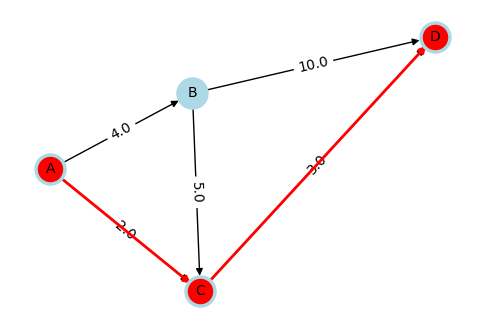

In [1]:
import heapq
import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class GraphGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Поиск кратчайшего пути (Дейкстра)")
        
    
        self.control_frame = tk.Frame(master)
        self.control_frame.pack(side=tk.TOP, fill=tk.X)
        
        self.canvas_frame = tk.Frame(master)
        self.canvas_frame.pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)
       
       
        self.load_button = tk.Button(self.control_frame, text="Загрузить граф", command=self.load_graph)
        self.load_button.pack(side=tk.LEFT, padx=5, pady=5)
        
        self.start_label = tk.Label(self.control_frame, text="Начальная вершина:")
        self.start_label.pack(side=tk.LEFT, padx=5)
        self.start_entry = tk.Entry(self.control_frame, width=10)
        self.start_entry.pack(side=tk.LEFT, padx=5)
        
        self.end_label = tk.Label(self.control_frame, text="Конечная вершина:")
        self.end_label.pack(side=tk.LEFT, padx=5)
        self.end_entry = tk.Entry(self.control_frame, width=10)
        self.end_entry.pack(side=tk.LEFT, padx=5)
        
        self.find_button = tk.Button(self.control_frame, text="Найти путь", command=self.find_shortest_path)
        self.find_button.pack(side=tk.LEFT, padx=5)
        
        
        self.figure = plt.figure(figsize=(6, 4), dpi=100)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.canvas_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        self.graph = nx.DiGraph()
        self.pos = None
        self.shortest_path = None
        
    def load_graph(self):
        file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if not file_path:
            return
        
        self.graph.clear()
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) == 3:
                        u, v, w = parts
                        self.graph.add_edge(u, v, weight=float(w))
            
            self.draw_graph()
            messagebox.showinfo("Успех", "Граф успешно загружен!")
        except Exception as e:
            messagebox.showerror("Ошибка", f"Ошибка при загрузке файла: {str(e)}")
    
    def draw_graph(self):
        self.figure.clf()
        ax = self.figure.add_subplot(111)
        
        self.pos = nx.spring_layout(self.graph)
        
        nx.draw(self.graph, self.pos, ax=ax, with_labels=True, node_color='lightblue', 
                node_size=500, font_size=10, arrows=True)
    
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw_networkx_edge_labels(self.graph, self.pos, ax=ax, edge_labels=edge_labels)
        
        if self.shortest_path:
            path_edges = list(zip(self.shortest_path, self.shortest_path[1:]))
            nx.draw_networkx_nodes(self.graph, self.pos, ax=ax, nodelist=self.shortest_path, 
                                 node_color='red')
            nx.draw_networkx_edges(self.graph, self.pos, ax=ax, edgelist=path_edges, 
                                 edge_color='red', width=2)
        
        self.canvas.draw()
    
    def dijkstra(self, start, end):
        distances = {node: float('infinity') for node in self.graph.nodes()}
        previous_nodes = {node: None for node in self.graph.nodes()}
        distances[start] = 0
        
        priority_queue = [(0, start)]
        
        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)
            
            if current_node == end:
                break
                
            if current_distance > distances[current_node]:
                continue
                
            for neighbor, data in self.graph[current_node].items():
                weight = data['weight']
                distance = current_distance + weight
                
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous_nodes[neighbor] = current_node
                    heapq.heappush(priority_queue, (distance, neighbor))
        
        path = []
        current_node = end
        while previous_nodes[current_node] is not None:
            path.insert(0, current_node)
            current_node = previous_nodes[current_node]
        if path:
            path.insert(0, current_node)
        
        return path, distances.get(end, float('infinity'))
    
    def find_shortest_path(self):
        start_node = self.start_entry.get()
        end_node = self.end_entry.get()
        
        if not start_node or not end_node:
            messagebox.showerror("Ошибка", "Введите начальную и конечную вершины")
            return
            
        if start_node not in self.graph.nodes() or end_node not in self.graph.nodes():
            messagebox.showerror("Ошибка", "Указанные вершины не существуют в графе")
            return
            
        self.shortest_path, distance = self.dijkstra(start_node, end_node)
        
        if distance == float('infinity'):
            messagebox.showinfo("Результат", f"Пути между {start_node} и {end_node} не существует")
        else:
            messagebox.showinfo("Результат", 
                              f"Кратчайший путь: {' -> '.join(self.shortest_path)}\n"
                              f"Длина пути: {distance}")
            self.draw_graph()

if __name__ == "__main__":
    root = tk.Tk()
    app = GraphGUI(root)
    root.mainloop()

### Вывод